# WP2 Dataset Exploration

## Imports

In [1]:
# STL imports
from pathlib import Path
import dataclasses as dc

# package imports
import IPython.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ase
import ase.io
import ase.visualize
import ase.visualize.plot

# project imports
import sisclab22p6.data
import sisclab22p6.plotting
import sisclab22p6.features
import sisclab22p6.features_plotters
import sisclab22p6.target_plotters

## Load the dataset

In [2]:
filepath_data = "../../../../data/jij"
filename_table = "d_block_magnetic_data_modified.csv"
filename_structures = "dimer_clusters.extxyz"
table = sisclab22p6.data.load_jij_data(filepath = filepath_data, 
                                       filename_table=filename_table, 
                                       filename_structures=filename_structures)

Loaded Number samples: 1730, 1730.


Get basic overview over the table.

In [3]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1730 entries, 0 to 1729
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   workchain_label  1730 non-null   object 
 1   imp0             1730 non-null   int64  
 2   imp1             1730 non-null   int64  
 3   ilayer0          1730 non-null   int64  
 4   ilayer1          1730 non-null   int64  
 5   offset0          1730 non-null   int64  
 6   offset1          1730 non-null   int64  
 7   structure        1730 non-null   object 
 8   J                1730 non-null   float64
 9   D                1730 non-null   float64
 10  Dx               1730 non-null   float64
 11  Dy               1730 non-null   float64
 12  Dz               1730 non-null   float64
 13  KKR_rcut0        1730 non-null   float64
 14  KKR_rcut1        1730 non-null   float64
 15  KKR_rcut_unit    1730 non-null   object 
 16  rx               1730 non-null   float64
 17  ry            

In [4]:
table.describe(percentiles=[])

imp0         imp1  ilayer0      ilayer1  offset0      offset1  \
count  1730.000000  1730.000000   1730.0  1730.000000   1730.0  1730.000000   
mean     34.070520    34.642197      3.0     3.500578      0.0     1.684393   
std       9.476811     9.386857      0.0     0.500144      0.0     0.839895   
min      21.000000    21.000000      3.0     3.000000      0.0     1.000000   
50%      30.000000    39.000000      3.0     4.000000      0.0     2.000000   
max      48.000000    48.000000      3.0     4.000000      0.0     5.000000   

                 J             D            Dx            Dy            Dz  \
count  1730.000000  1.730000e+03  1.730000e+03  1.730000e+03  1.730000e+03   
mean      0.106156  5.101765e-01 -1.201944e-02 -2.528308e-02  6.159041e-02   
std       2.702029  1.322906e+00  4.418180e-01  7.348511e-01  1.127263e+00   
min     -22.868585  2.291476e-25 -4.119694e+00 -5.244082e+00 -7.671586e+00   
50%       0.000925  4.564347e-03 -1.735407e-24 -1.838302e-22 -8.691581e-24   
max      20.481686  1.446817e+01  3.109705e+00  5.480468e+00  1.399962e+01   

       KKR_rcut0  KKR_rcut1           rx           ry           rz  \
count     1730.0     1730.0  1730.000000  1730.000000  1730.000000   
mean         4.0        4.0    -0.439199    -0.003143     0.266206   
std          0.0        0.0     0.319320     0.026918     0.341833   
min          4.0        4.0    -1.255545    -0.120815    -0.970369   
50%          4.0        4.0    -0.418515     0.000000     0.000000   
max          4.0        4.0     0.209257     0.120815     0.970369   

                 r         mom1         mom2      tot_mom  
count  1730.000000  1730.000000  1730.000000  1730.000000  
mean      0.668810     1.358023     1.320008     2.678031  
std       0.189468     1.501137     1.465634     2.188568  
min       0.418515    -0.310712    -0.254711    -0.000046  
50%       0.717033     0.816979     0.851585     2.570425  
max       1.255545     4.423477     4.432922     8.843976

## Table column legend

The table columns can be grouped into different sections.

- `workchain_label`, `jij_uuid`: Human-readable and database identifier of the sample / structure.
- the remaining column groups concern properties of the defect atom **pair** embedded in the [host crystal Bi2Te3](https://en.wikipedia.org/wiki/Bismuth_telluride).
  - `imp0`, `imp1`, `ilayer0`, `ilayer1`, `offset0`, `offset1`: Pair chemical & geometrical configuration.
    - `imp`: Atomic number of the defect
    - `ilayer`; The unit cell of the host crystal Bi2Te3 is made up of 5 atoms, 2 Bi, 3 Te. In the bulk, they form a quintuple layer structure. `ilayer` enumerates these five layers. `ilayer` = 0,1,2 denote the three Te layers. `ilayer` = 3,4 denote the two Bi layers. All defect atoms are embedded in one of the two Bi layers in this dataset, never in one of the three Te layers. Imagine `ilayer` as the "vertical" position of the defect atom in the crystal.
    - `offset`: If the 5-atom unit cell is duplicated on its sides in the x- and y-plane, you end up with a 2D Bi2Te3 substrate five atoms thick. The `offset` denotes how many unit cells apart the two defect atoms are in that plane.
  - `J`, `D`, `Dx`, `Dy`, `Dz`: Pair magnetic interactions.
    - The magnetic interactions in the classical Heisenberg Hamiltonian of magnetism are scalar components of the tensor $\mathcal{J}_{ij}$, where $\vec{S}_i$ is the magnetic moment of atom $i$. For full explanation, see mozumder's master thesis.
    
$$
          \mathcal{H} = - \sum\limits_{\langle ij \rangle}\, J_{ij}
          \vec{S}_i\cdot\vec{S}_j - \sum\limits_{\langle ij \rangle}\, \vec{D}_{ij} \cdot
          (\vec{S}_i\times\vec{S}_j) \approx - \sum\limits_{\langle ij \rangle}\, \vec{S}_i
          \cdot \mathcal{J}_{ij} \vec{S}_j
$$

  - `rx`, `ry`, `rz`, `r`: Pair distances
  - `mom1`, `mom2`, `tot_mom`: Pair \& structure magnetic moments

## Dataset cleanup - drop duplicates

First question: Which identifier to use to uniquely address samples?

Is `workchain_label` unique? Is `jij_uuid` unique?

In [5]:
def display_duplicate_rows(table : pd.DataFrame, column_name : str):
    # Check for duplicate rows based on column 'workchain_label'
    try:
        duplicate_rows = pd.concat(group for _, group in table.groupby(column_name) if len(group) > 1)
        IPython.display.display(duplicate_rows)
    except ValueError as err:
        print(f"No duplicate rows for {column_name=}.")
    

In [6]:
display_duplicate_rows(table, 'workchain_label')

workchain_label  imp0  imp1  ilayer0  ilayer1  offset0  \
1201  Sc:Sc:Bi2Te3_il_3_4_Off_2    21    21        3        4        0   
1202  Sc:Sc:Bi2Te3_il_3_4_Off_2    21    21        3        4        0   
0     Sc:Ti:Bi2Te3_il_3_3_Off_1    21    22        3        3        0   
19    Sc:Ti:Bi2Te3_il_3_3_Off_1    21    22        3        3        0   

      offset1                                          structure  \
1201        2  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...   
1202        2  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...   
0           1  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...   
19          1  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...   

                 J             D  ...  KKR_rcut1  KKR_rcut_unit        rx  \
1201  2.575172e-23  7.535775e-23  ...        4.0       Angstrom -0.418515   
1202  2.575172e-23  7.535775e-23  ...        4.0       Angstrom -0.418515   
0     1.242709e-02  2.952999e-03  ...        4.0       Angstrom -0.418515   
19    1.242709e-02  2.952999e-03  ...        4.0       Angstrom -0.418515   

       ry        rz         r          mom1          mom2       tot_mom  \
1201  0.0  0.582221  0.717033 -2.631240e-11  4.161227e-12 -2.215117e-11   
1202  0.0  0.582221  0.717033 -2.631240e-11  4.161227e-12 -2.215117e-11   
0     0.0  0.000000  0.418515  1.856702e-06  8.152756e-01  8.152775e-01   
19    0.0  0.000000  0.418515  1.856702e-06  8.152756e-01  8.152775e-01   

                                  jij_uuid  
1201  c9ba2979-f836-49dd-ad7c-76b8161b4508  
1202  aa992674-7ccc-4ff9-bafd-d7d03e377eab  
0     9ec53578-777c-4884-a3a7-084ad3586748  
19    5c5cff9f-f037-4ab2-ad48-f4ce3743c3df  

[4 rows x 24 columns]

In [7]:
display_duplicate_rows(table, 'jij_uuid')

No duplicate rows for column_name='jij_uuid'.


In [8]:
# drop dupliates
print(table.shape)
table = table.drop_duplicates('workchain_label')
print(table.shape)

(1730, 24)
(1728, 24)


## Chemical elements in the dataset

First, the host crystal is bismuth telluride, [Bi2Te3](https://en.wikipedia.org/wiki/Bismuth_telluride).

We could get the host crystal elements from the `structure` column, but let's define it hard-coded.

In [9]:
host_crystal_elements = {83, 52} # Bi, Te

Next, let's look at the defect atoms elements.

In [10]:
# ilayer0 == 3 for all, offset0 == 0 for all
# so we can ignore them
print(table.ilayer0.unique())
print(table.offset0.unique())

[3]
[0]


In [11]:
# we are left with the relevant pair configuration columns
pair_configuration_columns = ['imp0','imp1','ilayer1','offset1']
table[pair_configuration_columns]

imp0  imp1  ilayer1  offset1
0       21    22        3        1
1       21    39        3        1
2       21    21        3        1
3       25    21        3        1
4       24    21        3        1
...    ...   ...      ...      ...
1725    24    41        3        5
1726    25    41        3        5
1727    42    41        3        5
1728    41    41        3        5
1729    41    43        3        5

[1728 rows x 4 columns]

In [12]:
# Define chemical element symbols
periodic_table_list = { 
    number : symbol for number, symbol in enumerate(
        ['X', 'H', 'He', 
         'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 
         'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 
         'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 
         'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 
         'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 
         'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og']
    )
                      }

In [13]:
print("Defect atom 0 elements:", set(table.imp0.unique()))
print("Defect atom 1 elements:", set(table.imp1.unique()))

Defect atom 0 elements: {21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48}
Defect atom 1 elements: {21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48}


In [14]:
print("Difference in element sets of both defect atoms:", set(table.imp0.unique()).symmetric_difference(table.imp1.unique()))

Difference in element sets of both defect atoms: set()


In [15]:
defect_elements = set(table.imp0.unique())
num_defect_elements = len(defect_elements)
print(f"{num_defect_elements=}, {defect_elements=}")

num_defect_elements=20, defect_elements={21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48}


In [16]:
print("Defect atom elements (symbols):", ", ".join([periodic_table_list[number] for number in defect_elements]))


Defect atom elements (symbols): Sc, Ti, V, Cr, Mn, Fe, Co, Ni, Cu, Zn, Y, Zr, Nb, Mo, Tc, Ru, Rh, Pd, Ag, Cd


So, the defect atom elements are the 3d and 4d transition metals in the d-block of the periodic table.

- 3d transition elements: 21-30: Scandium to Zinc
- 4d transition elements: 31-48: Yttrium to Cadmium

References: [ptable.com](https://ptable.com/#Electrons), [Wikipedia > d-block](https://en.wikipedia.org/wiki/Block_(periodic_table)#d-block), [Wikipedia > Transition metal](https://en.wikipedia.org/wiki/Transition_metal).

![periodic-table-blocks](https://upload.wikimedia.org/wikipedia/commons/f/f2/Periodic_table_blocks_spdf_%2832_column%29.svg)

Notice that of our 20 transition metals, only a few are intrinsically magnetic ([reference](https://e-magnetica.pl/magnetism_of_chemical_elements)): Fe, Co, Ni are ferromagnetic (FM); Cr, Mn are antiferromagnetic (AFM); the rest are either paramagnetic (PM) or diamagnetic (DM). Hence it can be expected that the FM and AFM defects have a higher magnetic isotropic interaction strength $J_{ij}$.

![periodic-table-magnetism](https://e-magnetica.pl/_media/magnetic_elements_magnetica.png)

Let's define a variable for all chemical elements present in the dataset.

In [17]:
dataset_elements = host_crystal_elements.union(defect_elements)
num_dataset_elements = len(dataset_elements)
print(f"{num_dataset_elements=}, {dataset_elements=}")

num_dataset_elements=22, dataset_elements={83, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 52}


## Host crystal structure

Let's visualize the host crystal bismuth telluride, [Bi2Te3](https://en.wikipedia.org/wiki/Bismuth_telluride).

In [18]:
!ls {filepath_data}

d_block_magnetic_data_modified.csv  host_structure_Bi2Te3.extxyz
dimer_clusters.extxyz		    host_structure_Bi2Te3_fixed.extxyz
fix_host_structure.py


In [19]:
host_structure = ase.io.read(Path(filepath_data) / "host_structure_Bi2Te3_fixed.extxyz", format='extxyz')

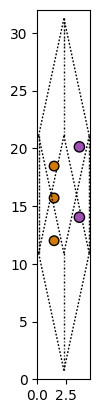

In [20]:
fig, ax = plt.subplots()
ase.visualize.plot.plot_atoms(host_structure, ax, radii=0.3, rotation=('90x,0y,0z'))
# ax.set_title("Bi2Te3 unit cell")
plt.savefig(f'fig/host-crystal-Bi2Te3-unit-cell.pdf')

In [21]:
# repeat host crystal unit cell repeated a few times in each cell direction and rescale center to unit cell
host_periodic = host_structure.repeat((3,3,2))
host_periodic.set_cell(host_structure.cell)
host_periodic.center()

In [22]:
# Plot host crystal periodic from three different perspectives
#
# references:
# - https://wiki.fysik.dtu.dk/ase//ase/visualize/visualize.html
# - https://matplotlib.org/3.0.2/gallery/subplots_axes_and_figures/subplots_demo.html
fontsize = 10
fig, axarr = plt.subplots(1,3, figsize=(8,10), sharex='col', sharey='row')
rot0 = '0x,0y,0z'
rot1 = '90x,0y,0z'
rot2 = '90x,45y,0z'
ase.visualize.plot.plot_atoms(host_periodic, axarr[0], radii=0.3, rotation=(rot0), show_unit_cell=1)
ase.visualize.plot.plot_atoms(host_periodic, axarr[1], radii=0.3, rotation=(rot1), show_unit_cell=1)
ase.visualize.plot.plot_atoms(host_periodic, axarr[2], radii=0.3, rotation=(rot2), show_unit_cell=1)
axarr[0].set_title(f"{rot0}", fontsize=fontsize)
axarr[1].set_title(f"{rot1}", fontsize=fontsize)
axarr[2].set_title(f"{rot2}", fontsize=fontsize)
# axarr[0].set_xlabel('[$\mathrm{\AA}$]')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axarr.flat:
    ax.label_outer()
plt.tight_layout()
plt.savefig(f'fig/host-crystal-Bi2Te3-repeated-3-3-2.pdf')

In the side perspective, one can clearly see the layered structure Bi2Te3. It is made up of "quintuple layers", repeated from the unit cell, from bottom to top: Te, Bi, Te, Te, Bi. In the dataset table, the layer counting goes like this: `ilayer` = (0, 3, 1, 2, 4). So the Te layers are counted first, then the Bi layers. All defect atoms are either embedded in `ilayer` 3 or 4, so in one of the two Bi layers, substituting a Bi atom (substitutional defects).

## Defect atom structures

In [23]:
# get max num atoms
n_atoms_max = max(struc.get_global_number_of_atoms() for struc in table.structure)
n_atoms_max

14

14 atoms max per structure is pretty small. So, minus 2 atoms for the two defect atoms, that leaves only about 6 atoms of the host crystal per impurity cluster. That is only the 1st-nearest-neighbor-shell in the host crystal.

## Defect atom pairs

Next, let's look at which variations of individual element pairs exist in the dataset.

We'd expect that each possible combination `X:Y` is present in the dataset, including the cases `X:X`.

In [24]:
def combination_with_repetition(n : int, k : int) -> int:
    """Get number of combinations (order does not matter) with repetition."""
    return int(np.math.factorial(n + k -1) / (np.math.factorial(k) * np.math.factorial(n-1)))

expected_num_defect_element_pairs = combination_with_repetition(n=num_defect_elements, k=2)
expected_num_defect_element_pairs

210

In [25]:
# get all defect element pairs present in the dataset
# 1) get unique combinations: drop_duplicates, 2) sort by atomic numbers, 3) convert dataframe to list of 2-tuples.
num_defect_element_pairs = table.drop_duplicates(['imp0','imp1']).shape[0]
defect_element_pairs = list(table.drop_duplicates(['imp0','imp1'])[['imp0','imp1']].sort_values(by=['imp0','imp1']).itertuples(index=False, name=None))

print(f"Actual {num_defect_element_pairs=}, \n\n{defect_element_pairs=}",)

Actual num_defect_element_pairs=400, 

defect_element_pairs=[(21, 21), (21, 22), (21, 23), (21, 24), (21, 25), (21, 26), (21, 27), (21, 28), (21, 29), (21, 30), (21, 39), (21, 40), (21, 41), (21, 42), (21, 43), (21, 44), (21, 45), (21, 46), (21, 47), (21, 48), (22, 21), (22, 22), (22, 23), (22, 24), (22, 25), (22, 26), (22, 27), (22, 28), (22, 29), (22, 30), (22, 39), (22, 40), (22, 41), (22, 42), (22, 43), (22, 44), (22, 45), (22, 46), (22, 47), (22, 48), (23, 21), (23, 22), (23, 23), (23, 24), (23, 25), (23, 26), (23, 27), (23, 28), (23, 29), (23, 30), (23, 39), (23, 40), (23, 41), (23, 42), (23, 43), (23, 44), (23, 45), (23, 46), (23, 47), (23, 48), (24, 21), (24, 22), (24, 23), (24, 24), (24, 25), (24, 26), (24, 27), (24, 28), (24, 29), (24, 30), (24, 39), (24, 40), (24, 41), (24, 42), (24, 43), (24, 44), (24, 45), (24, 46), (24, 47), (24, 48), (25, 21), (25, 22), (25, 23), (25, 24), (25, 25), (25, 26), (25, 27), (25, 28), (25, 29), (25, 30), (25, 39), (25, 40), (25, 41), (25, 42),

So, in actuality, for each `X:Y` defect elements pair there is also an `Y:X` pair (double-counting)

In [26]:
def permutation_with_repitition(n : int, k : int) -> int:
    """Get number of permutations (order matters) with repitition."""
    return n**k

In [27]:
permutation_with_repitition(n=num_defect_elements, k=2)

400

Are two `X:Y`, `Y:X` samples identical in their remaining column values? Let's look at the examples `Sc:Mo` and `Mo:Sc`.

In [28]:
table[(table['imp0']==21) & (table['imp1']==42)]

workchain_label  imp0  imp1  ilayer0  ilayer1  offset0  \
16    Sc:Mo:Bi2Te3_il_3_3_Off_1    21    42        3        3        0   
426   Sc:Mo:Bi2Te3_il_3_4_Off_1    21    42        3        4        0   
1016  Sc:Mo:Bi2Te3_il_3_3_Off_2    21    42        3        3        0   
1203  Sc:Mo:Bi2Te3_il_3_4_Off_2    21    42        3        4        0   

      offset1                                          structure         J  \
16          1  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...  0.251831   
426         1  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...  0.002083   
1016        2  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...  0.000396   
1203        2  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...  0.003541   

             D  ...  KKR_rcut1  KKR_rcut_unit        rx   ry        rz  \
16    0.071853  ...        4.0       Angstrom -0.418515  0.0  0.000000   
426   0.000011  ...        4.0       Angstrom  0.000000  0.0  0.582221   
1016  0.000364  ...        4.0       Angstrom -0.837030  0.0  0.000000   
1203  0.000806  ...        4.0       Angstrom -0.418515  0.0  0.582221   

             r      mom1      mom2   tot_mom  \
16    0.418515  0.014122  2.578522  2.592644   
426   0.582221 -0.002033  2.572786  2.570753   
1016  0.837030 -0.000235  2.575632  2.575397   
1203  0.717033 -0.002216  2.571753  2.569537   

                                  jij_uuid  
16    73cc53bc-5053-43d0-b7e0-fe9141d1411c  
426   1bd0b304-cc54-4d20-9bda-078fb7dbdafe  
1016  1fdde60b-851a-4c66-9383-ee5f045a5fad  
1203  583e2af2-50c3-4572-b39e-3d1b1909c86b  

[4 rows x 24 columns]

In [29]:
table[(table['imp0']==42) & (table['imp1']==21)]

workchain_label  imp0  imp1  ilayer0  ilayer1  offset0  \
198   Mo:Sc:Bi2Te3_il_3_3_Off_1    42    21        3        3        0   
586   Mo:Sc:Bi2Te3_il_3_4_Off_1    42    21        3        4        0   
810   Mo:Sc:Bi2Te3_il_3_3_Off_2    42    21        3        3        0   
1403  Mo:Sc:Bi2Te3_il_3_4_Off_2    42    21        3        4        0   

      offset1                                          structure         J  \
198         1  (Atom('Mo', [0.0, 0.0, 0.0], mass=95.96, index...  0.251985   
586         1  (Atom('Mo', [0.0, 0.0, 0.0], mass=95.96, index...  0.002107   
810         2  (Atom('Mo', [0.0, 0.0, 0.0], mass=95.96, index...  0.000386   
1403        2  (Atom('Mo', [0.0, 0.0, 0.0], mass=95.96, index...  0.003769   

             D  ...  KKR_rcut1  KKR_rcut_unit        rx   ry        rz  \
198   0.072910  ...        4.0       Angstrom -0.418515  0.0  0.000000   
586   0.000043  ...        4.0       Angstrom  0.000000  0.0  0.582221   
810   0.000402  ...        4.0       Angstrom -0.837030  0.0  0.000000   
1403  0.001541  ...        4.0       Angstrom -0.418515  0.0  0.582221   

             r      mom1      mom2   tot_mom  \
198   0.418515  2.577889  0.013911  2.591799   
586   0.582221  2.572272 -0.002042  2.570229   
810   0.837030  2.575786 -0.000307  2.575479   
1403  0.717033  2.570453 -0.002411  2.568043   

                                  jij_uuid  
198   036189ee-45e1-4c9f-b9a5-7bd35a9c204f  
586   4e6b1895-7097-4aee-99ba-65878640ecb8  
810   69786393-2a3f-4d42-97ca-1ac1f80755b7  
1403  b8a0e229-16bb-4c3e-b40f-dbe0d94bd0d5  

[4 rows x 24 columns]

So, they are not identical. The pair distances (`r` columns) are identical, but the magnetic moments are not identical, and the magnetic interactions (`J`, `D` columns) differ slightly.

Let's look at a visualization of two otherwise geometrically equivalent examples of these `Sc` `Mo` pairs. Then we see the difference in the geometry.

In [30]:
structure_Sc_Mo = list(table[table['jij_uuid'] == '73cc53bc-5053-43d0-b7e0-fe9141d1411c'].structure)[0]
structure_Sc_Mo_label = list(table[table['jij_uuid'] == '73cc53bc-5053-43d0-b7e0-fe9141d1411c'].workchain_label)[0]
structure_Sc_Mo.center()

structure_Mo_Sc = list(table[table['jij_uuid'] == '036189ee-45e1-4c9f-b9a5-7bd35a9c204f'].structure)[0]
structure_Mo_Sc_label = list(table[table['jij_uuid'] == '036189ee-45e1-4c9f-b9a5-7bd35a9c204f'].workchain_label)[0]
structure_Mo_Sc.center()

In [31]:
# # 3D view
# ase.visualize.view(structure_Sc_Mo, viewer='x3d')

In [32]:
# # 3D view
# ase.visualize.view(structure_Mo_Sc, viewer='x3d')

Let's visualize the structures again, now as matplotlib plots, with the host crystal unit cell.

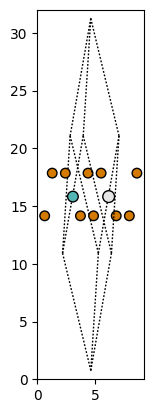

In [33]:
fig, ax = plt.subplots()
ase.visualize.plot.plot_atoms(structure_Sc_Mo, ax, radii=0.3, rotation=('90x,45y,0z'))
plt.savefig(f'fig/{structure_Sc_Mo_label}_side-view.pdf')

In [34]:
fig, ax = plt.subplots()
ase.visualize.plot.plot_atoms(structure_Sc_Mo, ax, radii=0.3, rotation=('0x,0y,0z'), show_unit_cell=True)
plt.savefig(f'fig/{structure_Sc_Mo_label}_top_view.pdf')

In [35]:
# references:
# - https://wiki.fysik.dtu.dk/ase//ase/visualize/visualize.html
# - https://matplotlib.org/3.0.2/gallery/subplots_axes_and_figures/subplots_demo.html
fontsize = 10
fig, axarr = plt.subplots(2,2, figsize=(10,6), sharex='col', sharey='row')
rot00 = '0x,0y,0z'
rot01 = '90x,45y,0z'
rot10 = '0x,0y,0z'
rot11 = '90x,45y,0z'
ase.visualize.plot.plot_atoms(structure_Sc_Mo, axarr[0,0], radii=0.3, rotation=(rot00), show_unit_cell=1)
ase.visualize.plot.plot_atoms(structure_Sc_Mo, axarr[0,1], radii=0.3, rotation=(rot01), show_unit_cell=1)
ase.visualize.plot.plot_atoms(structure_Mo_Sc, axarr[1,0], radii=0.3, rotation=(rot10), show_unit_cell=1)
ase.visualize.plot.plot_atoms(structure_Mo_Sc, axarr[1,1], radii=0.3, rotation=(rot11), show_unit_cell=1)
axarr[0,0].set_title(f"{structure_Sc_Mo_label}, {rot00}", fontsize=fontsize)
axarr[0,1].set_title(f"{structure_Sc_Mo_label}, {rot01}", fontsize=fontsize)
axarr[1,0].set_title(f"{structure_Mo_Sc_label}, {rot10}", fontsize=fontsize)
axarr[1,1].set_title(f"{structure_Mo_Sc_label}, {rot11}", fontsize=fontsize)
# axarr[1,0].set_xlabel('[$\mathrm{\AA}$]')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axarr.flat:
    ax.label_outer()
plt.savefig('fig/Sc:Mo-and-Mo:Sc:Bi2Te3_il_3_3_Off_3.pdf')    

## Distances between defect atoms

Let's look at the distribution of the relative distance `'r'` between the two defect atoms in each structure.

In [87]:
defect_atom_distances = np.array(sorted(table['r'].unique()))
print(f"{defect_atom_distances=}")
num_defect_atom_distances = len(table['r'].unique())

defect_atom_distances=array([0.41851489, 0.58222112, 0.71703288, 0.74789889, 0.83702979,
       1.        , 1.01960791, 1.12248457, 1.16202815, 1.25554468])


Note that the unit here is NOT Angstrom, but lattice constant units (see e.g [KKR inputcard](https://iffgit.fz-juelich.de/kkr/jukkr/-/wikis/jumu/inputcard_codewords) > ALATBASIS). Ie, r = 1 means 1 lattice constant = length of the longest lattice constant vector of the crystal unit cell. Here is how to convert the values to Angstrom, as an example.

In [88]:
# r min, max in ALAT units (sorted list)
rmin_alat = defect_atom_distances[0]
rmax_alat = defect_atom_distances[-1]

In [89]:
# just for demo purposes, get random (first two) structures with rmin and rmax.
# we will use them to calculate the rmin, rmax in Angstrom units, to double-check the conversion from r in ALAT units to Angstrom below
struc_with_rmin = table.loc[table['r'] == rmin_alat, ['structure']].values[0][0]
struc_with_rmax = table.loc[table['r'] == rmax_alat, ['structure']].values[0][0]

In [90]:
defect_indices = sisclab22p6.features.get_defect_atoms_indices([struc_with_rmin, struc_with_rmax])

In [91]:
rmin_angstrom = struc_with_rmin.get_distances(defect_indices[0], indices=defect_indices[1])[0]
rmax_angstrom = struc_with_rmax.get_distances(defect_indices[0], indices=defect_indices[1])[0]

In [92]:
# what is the conversion factor?
print(rmin_alat, rmin_angstrom)
print(rmax_alat, rmax_angstrom)
print(rmin_angstrom / rmin_alat, rmax_angstrom / rmax_alat)

0.41851489357247 4.38296316
1.2555446807174 13.14888949
10.472657550097548 10.472657558062304


In [93]:
# calc the conversion factor from the host crystal. 
# v_angstrom = alat * v_alat
# alat = longest lattice constant = length of unit cell vector of (host) crystal
# bravais matrix = list of unit cell vectors = basis vectors, they span the infinite 3D 'bravais lattice' of the crystal
bravais = np.array(host_structure.cell)
alat = np.linalg.norm(bravais, axis=1).max()
alat 

10.472657559692438

In [98]:
# convert to angstrom
table['r_angstrom'] = alat * table['r']
defect_atom_distances = np.array(sorted(table['r_angstrom'].unique()))
print(f"{defect_atom_distances=}")

defect_atom_distances=array([ 4.38296316,  6.09740243,  7.50923981,  7.83248899,  8.76592633,
       10.47265756, 10.67800453, 11.75539655, 12.16952294, 13.14888949])


In [103]:
# count structures by their relative defect atom poir distances
# also print ilayer1, offset1, because they determine the relative distance 'r'
distances_counts = table.groupby(['r_angstrom', 'ilayer1', 'offset1']).size().reset_index().rename(columns={0:'count'}).sort_values(by=['r_angstrom'], ascending=[True])
distances_counts

r_angstrom  ilayer1  offset1  count
0    4.382963        3        1    400
1    6.097402        4        1    400
2    7.509240        4        2    399
3    7.832489        4        3     24
4    8.765926        3        2    400
5   10.472658        3        3     21
6   10.678005        4        4     21
7   11.755397        4        5     21
8   12.169523        3        4     21
9   13.148889        3        5     21

In [108]:
# plot defect atom pairs distances distribution
sns.barplot(data=distances_counts.round(3), x='r_angstrom', y='count')
plt.savefig('fig/distance-distribution.pdf')

This could indicate that we should exclude the structures with `r >= 10 Angstrom` from the test dataset, and only use it for model training, not model testing (compare with the example in ML Tutorial 1, Rupp2015).

In [107]:
# separate table by 'r >= 1.0' (lattice units) criterion for model training
table_with_r_smaller_1 = table[table['r_angstrom'] < 10]
table_with_r_larger_1 = table[table['r_angstrom'] >= 10]
print(f"{table_with_r_smaller_1.shape=}, {table_with_r_larger_1.shape=}")

table_with_r_smaller_1.shape=(1623, 25), table_with_r_larger_1.shape=(105, 25)


## Defect atom geometries

Next, let's find out which different geometric configurations of defect atom pairs are present in the dataset, i.e., variations of `ilayer1` and `offset1` per defect element pair (which layer in the unit cell, how many unit cells apart).

- Which geometry configs exist, what is their distribution?
- Which variations of `ilayer1` and `offset1` exist per defect element pair?
- Are the configurations the same for all element pairs?

In [42]:
config_counts = table.groupby(['ilayer1', 'offset1']).size().reset_index().rename(columns={0:'count'}).sort_values(by=['count', 'ilayer1', 'offset1'], ascending=[False, True, True])
config_counts

ilayer1  offset1  count
0        3        1    400
1        3        2    400
5        4        1    400
6        4        2    399
7        4        3     24
2        3        3     21
3        3        4     21
4        3        5     21
8        4        4     21
9        4        5     21

In [43]:
# plot the configuration distribution across the dataset
config_counts_pivot = config_counts.pivot(index='ilayer1', columns='offset1', values='count')
sns.heatmap(data=config_counts_pivot, annot=True, fmt=".0f", linewidth=.5) #.set(title="Defect atom geometry configurations")
plt.savefig('fig/geometry-config-distribution.pdf')

We can see how the geometry config distribution reflects the relative distances distribution above.

## Defect atom geometries - a closer look

Next, let's look at how those geometry configurations are distributed among the defect element pairs.

In [44]:
# for each defect element pair, get number of configurations
# reference: https://stackoverflow.com/a/35268906/8116031
# 1) group rows by defect element pairs, 2) convert to Series, 3) now imp0 is index, restore original index, 4) now count column has name '0', rename
pair_configuration_counts = table.groupby(['imp0','imp1']).size().reset_index().rename(columns={0:'count'})
# now we have for each X:Y element pair the number of configurations
# classify those counts by number of different configurations
pair_configuration_counts['count'].value_counts()

4     375
10     21
5       3
3       1
Name: count, dtype: int64

So, we have 375 `X:Y` pairs which exist in 4 different geometrical configurations, 21 `X:Y` pairs with 10 different configurations, 3 with 5 different configurations, and 1 with only three configurations.

But now we don't know which pairs these are.

So, let's find out which element pairs have these different numbers of existing configurations.

*Note: This could probably be done more efficiently with pure Pandas instead of custom boiler code.*

In [45]:
@dc.dataclass
class ConfigurationGroup:
    """Defect atom pair structures grouped by geometrical configurations.
    
    configs: list of configurations. One config = tuple (ilayer1, offset1) = position of second defect atom in which Bi layer in Bi2Te3 quintuple layer unit cell (3 or 4), offset1 = position of second defect atom in how many unit cells removed from first defect atom.
    pairs: Number of element pairs which have these configurations.
    """
    configs : set = None
    pairs : set = None
    jij_uuids : list = None
    
    def __repr__(self):
        return f"Configs: {self.configs}, num. pairs: {len(self.pairs)}, num. structures: {len(self.jij_uuids)}"

In [48]:
def collect_configuration_groups(table: pd.DataFrame):
    """Return list of ConfigurationGroups present in table.
    """

    # step 1: collect all configurations as key-value, key = element pair, value = list of configs
    pair_configs = dict()
    pair_uuids = dict()
    def process(imp0, imp1, ilayer1, offset1, jij_uuid):
        key = (imp0, imp1)
        if key not in pair_configs:
            pair_configs[key] = set()
            pair_uuids[key] = list()
        pair_configs[key].add((ilayer1,offset1))
        pair_uuids[key].append(jij_uuid)
    _ = [process(imp0, imp1, ilayer1, offset1, jij_uuid) for imp0, imp1, ilayer1, offset1, jij_uuid in zip(table.imp0, table.imp1, table.ilayer1, table.offset1, table.jij_uuid)]
    # pair_configurations

    # step 2: invert dict: key = list of configs, value = list of correspondent pairs
    config_groups = list()
    for pair, configs in pair_configs.items():
        # find index correspondent config group
        indices = [i for i, group in enumerate(config_groups) if group.configs == configs]
        if not indices:
            # config group does not exist yet, create
            config_groups.append(ConfigurationGroup(configs=configs, pairs={pair}, jij_uuids=pair_uuids[pair]))
            continue
        idx = indices[0]
        config_groups[idx].pairs.add(pair)
        config_groups[idx].jij_uuids.extend(pair_uuids[pair])

    # sort
    for group in config_groups:
        group.configs = sorted(group.configs)
        group.pairs = sorted(group.pairs)
    config_groups.sort(key=lambda group: len(group.configs))

    return config_groups

In [49]:
config_groups = collect_configuration_groups(table)
config_groups

[Configs: [(3, 1), (3, 2), (4, 1)], num. pairs: 1, num. structures: 3,
 Configs: [(3, 1), (3, 2), (4, 1), (4, 2)], num. pairs: 375, num. structures: 1500,
 Configs: [(3, 1), (3, 2), (4, 1), (4, 2), (4, 3)], num. pairs: 3, num. structures: 15,
 Configs: [(3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5)], num. pairs: 21, num. structures: 210]

So, in summary, for ~86 % of structures, we have four configurations (`ilayer11`, `offset1` pairs): `(3, 1), (3, 2), (4, 1), (4, 2)`.

Remember, `ilayer0` always = 3, `offset0` always = 0. So, `ilayer1` = 3 means, both defect atoms are "on the same height" (in the same Bi layer), and `offset1` = 1 means 2nd defect atom is one unit cell removed.

So, for the majority of structures, we have `(3,1), (3,2)`: two configs with both defect atoms in the same layer and one resp. two unit cells apart, and `(4,1), (4,2)`, two configs with the two defect atoms in different Bi layers, and also one resp. two unit cells apart.

Let's visualize the configs of the majority group of 1500 structures. We'll pick a random representative pair of this group, (Cr, Fe) = (24,26).

In [54]:
# get majority group and check for presence of representative pair
pair = (24, 26) # (Cr, Fe)
majority_group = [group for group in config_groups if len(group.jij_uuids) > 1000][0]
assert pair in majority_group.pairs

In [79]:
# get all structures (representing all geometry configs of the majority group) from table
configs = table[(table['imp0']==pair[0]) & (table['imp1']==pair[1])]
configs = configs[['workchain_label','imp0','imp1','ilayer1','offset1','structure','J','r']].sort_values(by=['ilayer1','offset1'])
configs

workchain_label  imp0  imp1  ilayer1  offset1  \
365   Cr:Fe:Bi2Te3_il_3_3_Off_1    24    26        3        1   
1076  Cr:Fe:Bi2Te3_il_3_3_Off_2    24    26        3        2   
462   Cr:Fe:Bi2Te3_il_3_4_Off_1    24    26        4        1   
1278  Cr:Fe:Bi2Te3_il_3_4_Off_2    24    26        4        2   

                                              structure         J         r  
365   (Atom('Cr', [2.1914815850000005, -4.9960036108... -6.644377  0.418515  
1076  (Atom('Cr', [4.3829631650000005, -5.0182080713...  0.838575  0.837030  
462   (Atom('Cr', [-3.244044413473232e-17, -5.018208...  0.609060  0.582221  
1278  (Atom('Cr', [2.1914815853594125, 2.07456718470...  2.221204  0.717033

In [65]:
# get structures for each config ilayer1, offset1
structure_3_1 = configs.iat[0,5]
structure_3_2 = configs.iat[1,5]
structure_4_1 = configs.iat[2,5]
structure_4_2 = configs.iat[3,5]

structure_3_1.center()
structure_3_2.center()
structure_4_1.center()
structure_4_2.center()

<AxesSubplot: >

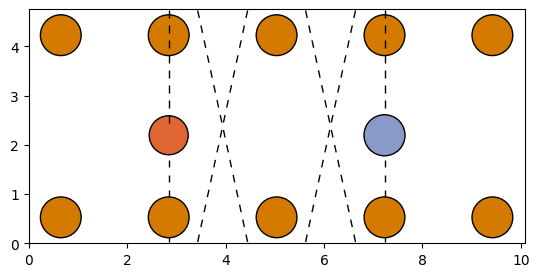

In [68]:
fig, ax = plt.subplots()
ase.visualize.plot.plot_atoms(structure_3_1, ax, radii=0.3, rotation=('90x,0y,0z'), show_unit_cell=True)
# plt.savefig(f'fig/{structure_Sc_Mo_label}_top_view.pdf')

In [70]:
# plot structures
# references:
# - https://wiki.fysik.dtu.dk/ase//ase/visualize/visualize.html
# - https://matplotlib.org/3.0.2/gallery/subplots_axes_and_figures/subplots_demo.html
fontsize = 10
fig, axarr = plt.subplots(2,2, figsize=(20,6), sharex='col', sharey='row')
rot00 = '90x,0y,0z'
rot01 = '90x,0y,0z'
rot10 = '90x,0y,0z'
rot11 = '90x,0y,0z'
# rot01 = '90x,45y,0z'
ase.visualize.plot.plot_atoms(structure_3_1, axarr[0,0], radii=0.3, rotation=(rot00), show_unit_cell=True)
ase.visualize.plot.plot_atoms(structure_4_1, axarr[0,1], radii=0.3, rotation=(rot01), show_unit_cell=True)
ase.visualize.plot.plot_atoms(structure_3_2, axarr[1,0], radii=0.3, rotation=(rot10), show_unit_cell=True)
ase.visualize.plot.plot_atoms(structure_4_2, axarr[1,1], radii=0.3, rotation=(rot11), show_unit_cell=True)
axarr[0,0].set_title(f"Cr:Fe, 3-1, {rot00}", fontsize=fontsize)
axarr[0,1].set_title(f"Cr:Fe, 4-1, {rot01}", fontsize=fontsize)
axarr[1,0].set_title(f"Cr:Fe, 3-2, {rot10}", fontsize=fontsize)
axarr[1,1].set_title(f"Cr:Fe, 4-2, {rot11}", fontsize=fontsize)
# axarr[1,0].set_xlabel('[$\mathrm{\AA}$]')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axarr.flat:
    ax.label_outer()
# plt.savefig('fig/Sc:Mo-and-Mo:Sc:Bi2Te3_il_3_3_Off_3.pdf')    

In [71]:
# plot structures
# references:
# - https://wiki.fysik.dtu.dk/ase//ase/visualize/visualize.html
# - https://matplotlib.org/3.0.2/gallery/subplots_axes_and_figures/subplots_demo.html
fontsize = 10
fig, axarr = plt.subplots(2,2, figsize=(20,6), sharex='col', sharey='row')
rot00 = '0x,0y,0z'
rot01 = '0x,0y,0z'
rot10 = '0x,0y,0z'
rot11 = '0x,0y,0z'
# rot01 = '90x,45y,0z'
ase.visualize.plot.plot_atoms(structure_3_1, axarr[0,0], radii=0.3, rotation=(rot00), show_unit_cell=True)
ase.visualize.plot.plot_atoms(structure_4_1, axarr[0,1], radii=0.3, rotation=(rot01), show_unit_cell=True)
ase.visualize.plot.plot_atoms(structure_3_2, axarr[1,0], radii=0.3, rotation=(rot10), show_unit_cell=True)
ase.visualize.plot.plot_atoms(structure_4_2, axarr[1,1], radii=0.3, rotation=(rot11), show_unit_cell=True)
axarr[0,0].set_title(f"Cr:Fe, 3-1, {rot00}", fontsize=fontsize)
axarr[0,1].set_title(f"Cr:Fe, 4-1, {rot01}", fontsize=fontsize)
axarr[1,0].set_title(f"Cr:Fe, 3-2, {rot10}", fontsize=fontsize)
axarr[1,1].set_title(f"Cr:Fe, 4-2, {rot11}", fontsize=fontsize)
# axarr[1,0].set_xlabel('[$\mathrm{\AA}$]')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axarr.flat:
    ax.label_outer()
# plt.savefig('fig/Sc:Mo-and-Mo:Sc:Bi2Te3_il_3_3_Off_3.pdf')    

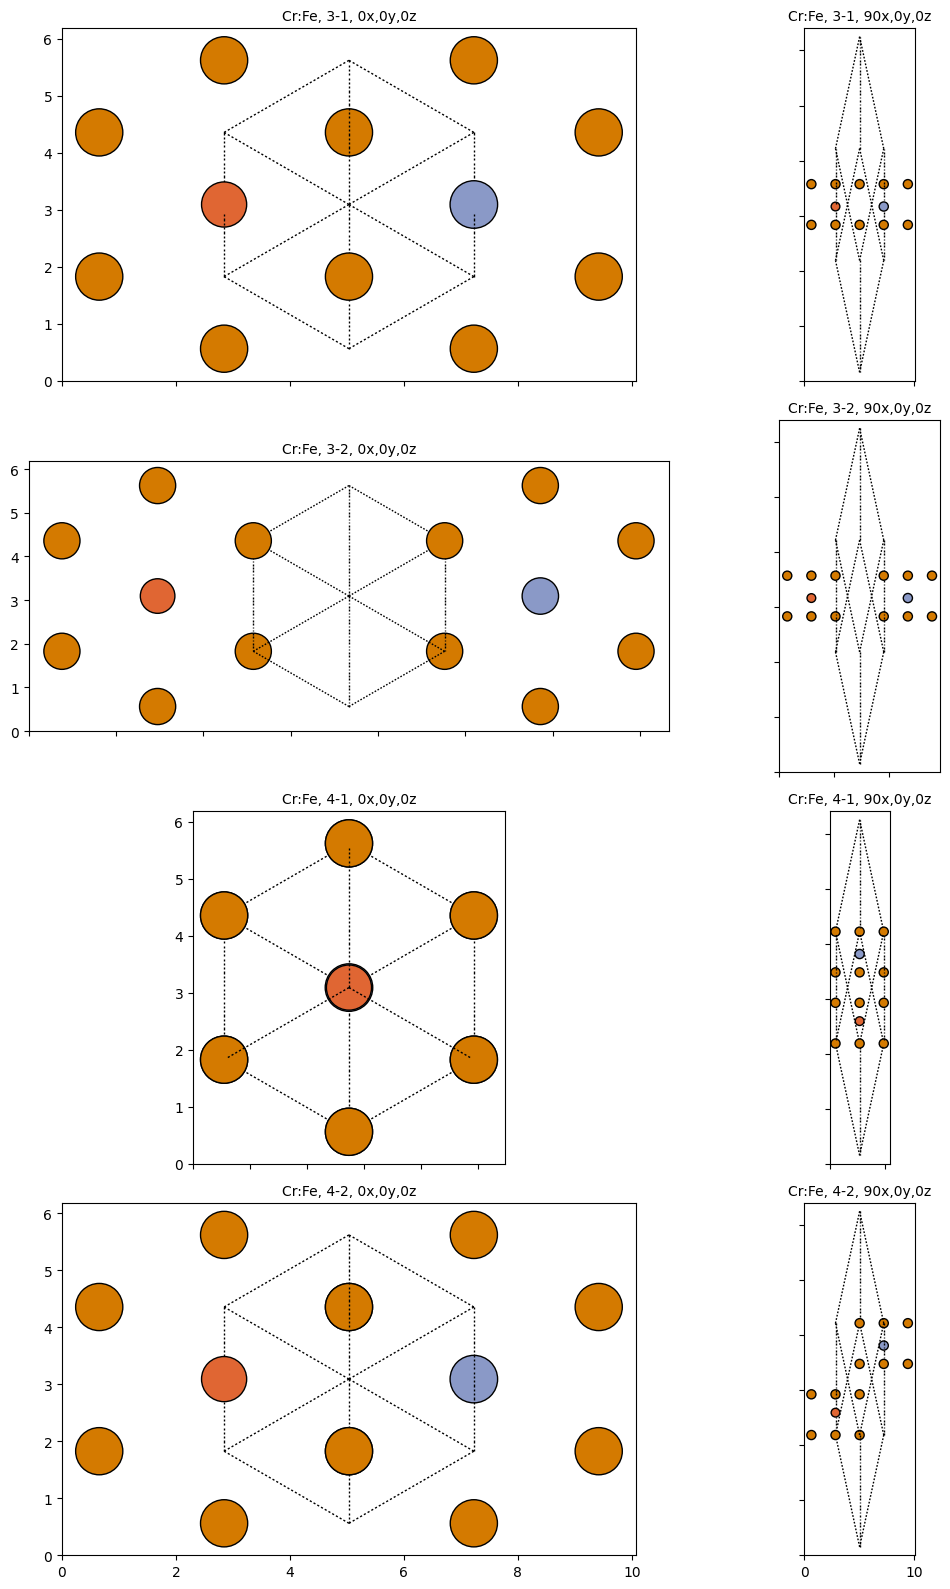

In [86]:
# plot structures
# references:
# - https://wiki.fysik.dtu.dk/ase//ase/visualize/visualize.html
# - https://matplotlib.org/3.0.2/gallery/subplots_axes_and_figures/subplots_demo.html
fontsize = 10
# fig, axarr = plt.subplots(4,2, figsize=(20,16), sharex='col', sharey='row')
fig, axarr = plt.subplots(4,2, figsize=(12,16))
rot00 = '0x,0y,0z'
rot01 = '90x,0y,0z'
rot10 = '0x,0y,0z'
rot11 = '90x,0y,0z'
rot20 = '0x,0y,0z'
rot21 = '90x,0y,0z'
rot30 = '0x,0y,0z'
rot31 = '90x,0y,0z'
# rot01 = '90x,45y,0z'
ase.visualize.plot.plot_atoms(structure_3_1, axarr[0,0], radii=0.3, rotation=(rot00), show_unit_cell=2)
ase.visualize.plot.plot_atoms(structure_3_1, axarr[0,1], radii=0.3, rotation=(rot01), show_unit_cell=2)
ase.visualize.plot.plot_atoms(structure_3_2, axarr[1,0], radii=0.3, rotation=(rot10), show_unit_cell=2)
ase.visualize.plot.plot_atoms(structure_3_2, axarr[1,1], radii=0.3, rotation=(rot11), show_unit_cell=2)
ase.visualize.plot.plot_atoms(structure_4_1, axarr[2,0], radii=0.3, rotation=(rot20), show_unit_cell=2)
ase.visualize.plot.plot_atoms(structure_4_1, axarr[2,1], radii=0.3, rotation=(rot21), show_unit_cell=2)
ase.visualize.plot.plot_atoms(structure_4_2, axarr[3,0], radii=0.3, rotation=(rot30), show_unit_cell=2)
ase.visualize.plot.plot_atoms(structure_4_2, axarr[3,1], radii=0.3, rotation=(rot31), show_unit_cell=2)
axarr[0,0].set_title(f"Cr:Fe, 3-1, {rot00}", fontsize=fontsize)
axarr[0,1].set_title(f"Cr:Fe, 3-1, {rot01}", fontsize=fontsize)
axarr[1,0].set_title(f"Cr:Fe, 3-2, {rot10}", fontsize=fontsize)
axarr[1,1].set_title(f"Cr:Fe, 3-2, {rot11}", fontsize=fontsize)
axarr[2,0].set_title(f"Cr:Fe, 4-1, {rot20}", fontsize=fontsize)
axarr[2,1].set_title(f"Cr:Fe, 4-1, {rot21}", fontsize=fontsize)
axarr[3,0].set_title(f"Cr:Fe, 4-2, {rot30}", fontsize=fontsize)
axarr[3,1].set_title(f"Cr:Fe, 4-2, {rot31}", fontsize=fontsize)
# axarr[1,0].set_xlabel('[$\mathrm{\AA}$]')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axarr.flat:
    ax.label_outer()
plt.tight_layout()
plt.savefig('fig/majority-geometry-configs_3-1_3-2_4-1_4-2.pdf')
plt.savefig('fig/majority-geometry-configs_3-1_3-2_4-1_4-2.png')

Let's next look at the "minority groups". Element pairs with different sets of configurations.

In [92]:
num_samples = table.shape[0]

In [104]:
import dscribe.descriptors

In [234]:
# get element pairs as symbols for minority configuration groups
minority_groups = [group for group in config_groups if len(group.jij_uuids) < 1000]
minority_groups

[Configs: [(3, 1), (3, 2), (4, 1)], num. pairs: 1, num. structures: 3,
 Configs: [(3, 1), (3, 2), (4, 1), (4, 2), (4, 3)], num. pairs: 3, num. structures: 15,
 Configs: [(3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5)], num. pairs: 21, num. structures: 210]

For one pair, the `(4,2)` config is missing. For three pairs, we additionally have `(4,3)`, different layers and three unit cells apart. For 21 pairs, we additionally have `(3,3), (3,4), (3,5)`, in same layer and 3-5 unit cells apart, and additionally `(4,3), (4,4), (4,5)`, different layer and 3-5 unit cells apart.

In [245]:
minority_elements = set()
for group in minority_groups:
    pair_symbols = [(periodic_table_list[p[0]], periodic_table_list[p[1]]) for p in group.pairs]
    minority_elements.update([p[0] for p in group.pairs])
    minority_elements.update([p[1] for p in group.pairs])
    print(f"Defect pairs of minority config group {group.configs}: {pair_symbols}")
print(f"Minority elements: {[periodic_table_list[number] for number in sorted(minority_elements)]}")

Defect pairs of minority config group [(3, 1), (3, 2), (4, 1)]: [('Ni', 'Ru')]
Defect pairs of minority config group [(3, 1), (3, 2), (4, 1), (4, 2), (4, 3)]: [('Cr', 'V'), ('Mn', 'V'), ('Mn', 'Cr')]
Defect pairs of minority config group [(3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5)]: [('V', 'V'), ('V', 'Cr'), ('V', 'Mn'), ('V', 'Nb'), ('V', 'Mo'), ('V', 'Tc'), ('Cr', 'Cr'), ('Cr', 'Mn'), ('Cr', 'Nb'), ('Cr', 'Mo'), ('Cr', 'Tc'), ('Mn', 'Mn'), ('Mn', 'Nb'), ('Mn', 'Mo'), ('Mn', 'Tc'), ('Nb', 'Nb'), ('Nb', 'Tc'), ('Mo', 'Nb'), ('Mo', 'Mo'), ('Mo', 'Tc'), ('Tc', 'Tc')]
Minority elements: ['V', 'Cr', 'Mn', 'Ni', 'Nb', 'Mo', 'Tc', 'Ru']


So, for pairs involving elements 'V', 'Cr', 'Mn', 'Ni', 'Nb', 'Mo', 'Tc', 'Ru', we have a few additional configs (or less for Ni, Ru) with longer defect atom distances.

Why? Cause Cr, Mn are antiferromagnetic, and in the master thesis which produced this dataset, it was shown that these defects have a beneficial effect on the $J_{ij}$ interaction in order to induce the Quantum Anomolous Hall Effect (QAHE), thereby turning Bi2Te3 into a topological insulator (isolation in bulk, exotic conductance on the surface).

**Question:** What does this mean for the case that the trained ML model is used to precit magnetic interactions for distances >= 1.0, but for other defect element pairs? Will it use information from these minority groups? "How much"?

## Magnetic interactions

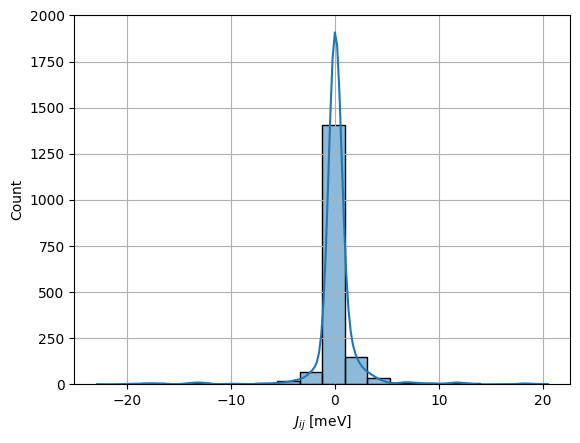

In [5]:
sns.histplot(data=table['J'], bins=20, kde=True).set_xlabel("$J_{ij}$ [meV]")
plt.grid()
plt.savefig('fig/target-Jij-distribution.pdf')

In [8]:
# plot Jij as heatmap matrix and save
heatmap_matrix, missing_defect_pairs = sisclab22p6.target_plotters.create_heatmap_matrix(table, value_column='J')
sisclab22p6.target_plotters.plot_heatmap(heatmap_matrix, publication_target='slides', fontsize='small')
plt.savefig('fig/heatmap-jij-ilayer3-offset1.pdf')

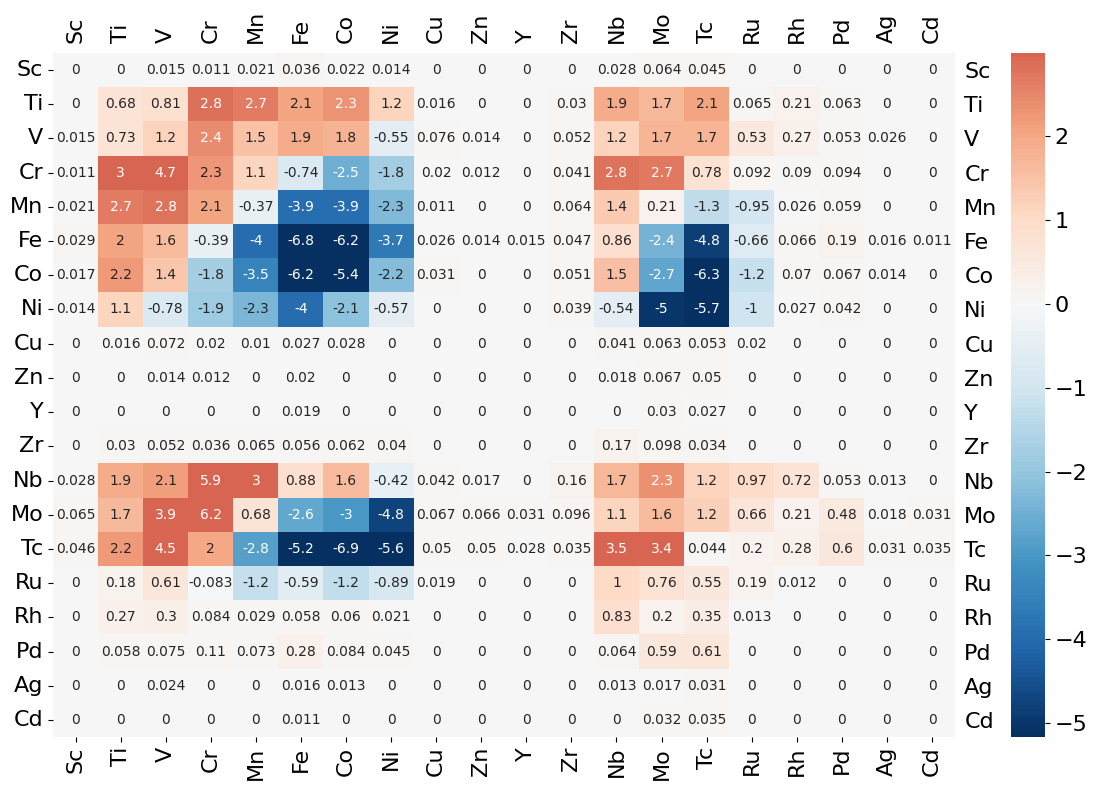

In [14]:
# plot Jij as heatmap matrix and save
heatmap_matrix, missing_defect_pairs = sisclab22p6.target_plotters.create_heatmap_matrix(table, value_column='J', aggregate_function='mean', ilayer1=None, offset1=None)
sisclab22p6.target_plotters.plot_heatmap(heatmap_matrix, publication_target='slides', fontsize='small')
plt.savefig('fig/heatmap-jij-mean-over-all-configs.pdf')

<AxesSubplot: xlabel='D', ylabel='Count'>

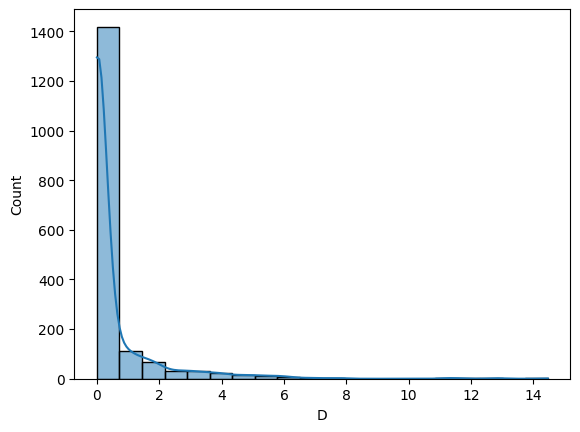

In [11]:
# table.hist(column='D', bins=20)
sns.histplot(data=table['D'], bins=20, kde=True)

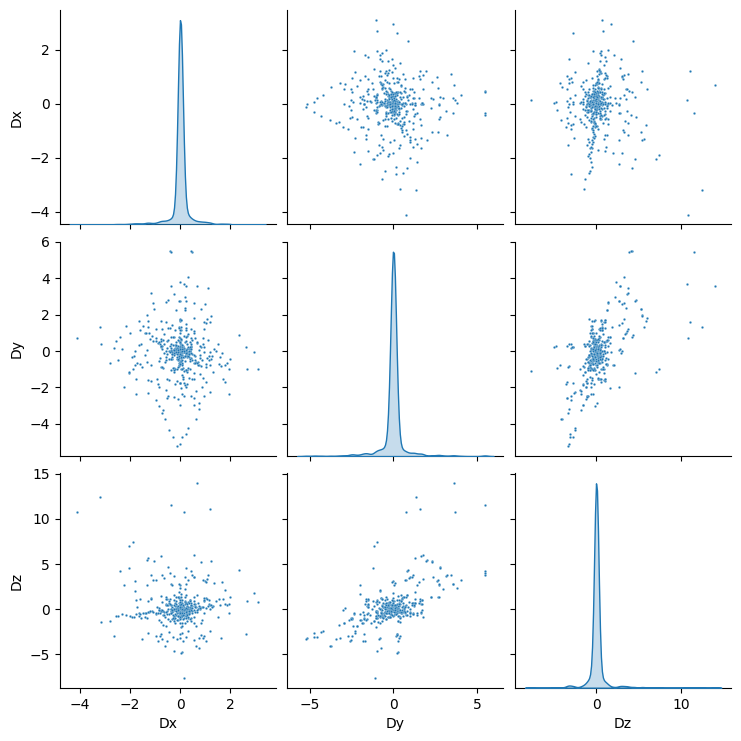

In [34]:
# note: if pairplot takes too long, try downsampling: table[...].sample(100)
sns.pairplot(table[['Dx','Dy', 'Dz']], diag_kind='kde', plot_kws={"s": 3})

## Magnetic moments

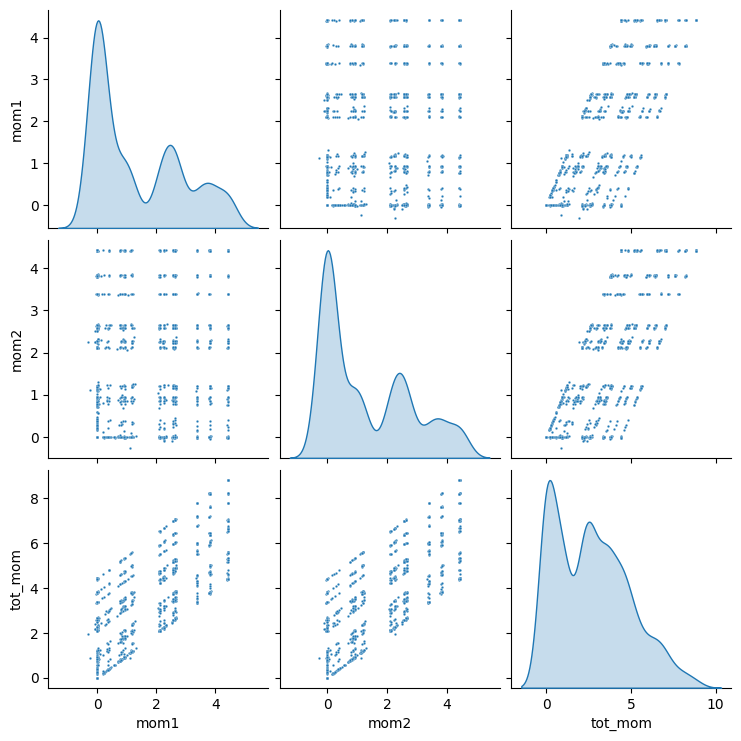

In [31]:
sns.pairplot(table[['mom1','mom2', 'tot_mom']], diag_kind='kde', plot_kws={"s": 3})

## Possible correlations

In [39]:
table.columns

Index(['workchain_label', 'imp0', 'imp1', 'ilayer0', 'ilayer1', 'offset0',
       'offset1', 'structure', 'J', 'D', 'Dx', 'Dy', 'Dz', 'KKR_rcut0',
       'KKR_rcut1', 'KKR_rcut_unit', 'rx', 'ry', 'rz', 'r', 'mom1', 'mom2',
       'tot_mom', 'jij_uuid'],
      dtype='object')

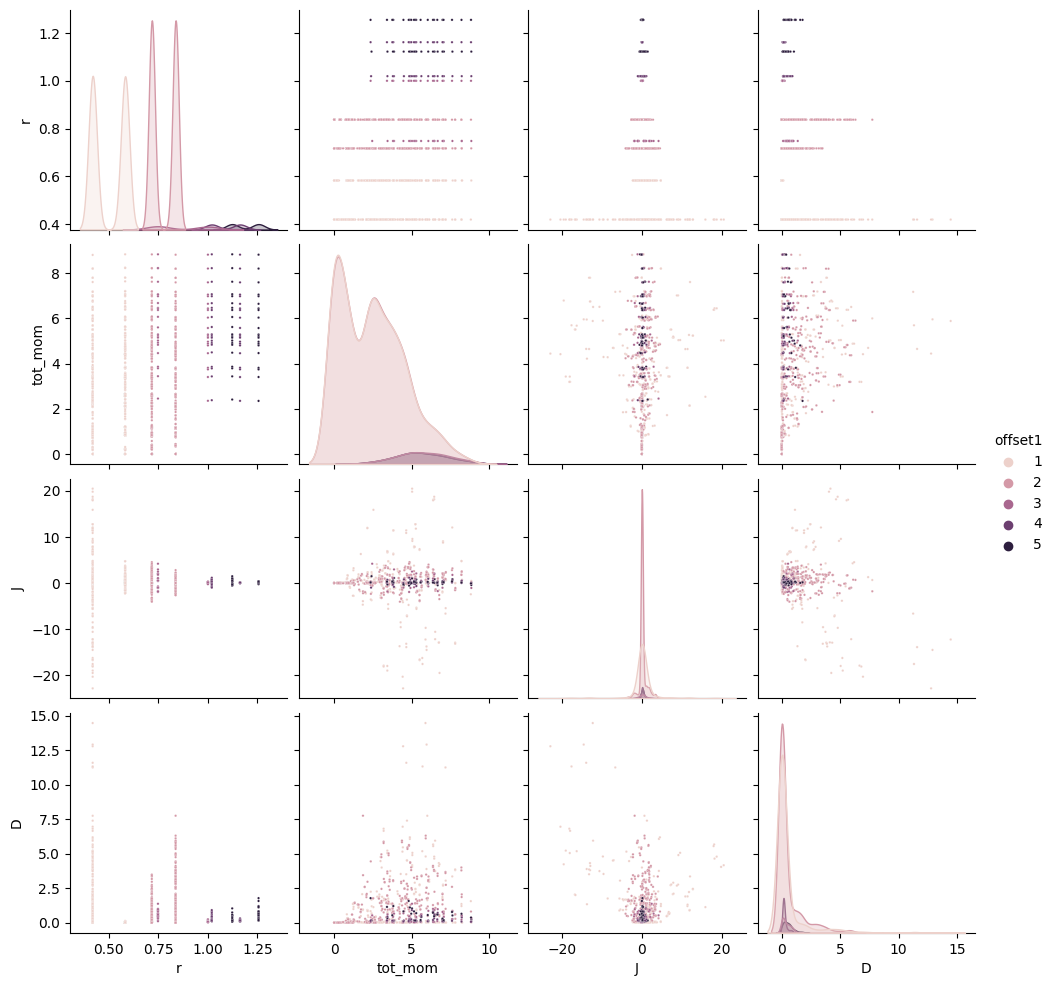

In [53]:
sns.pairplot(table[['r','tot_mom','J', 'D', 'offset1']], diag_kind='kde', plot_kws={"s": 3}, hue='offset1', corner=False)
plt.savefig('fig/pairplot-r-totmom-J-D-offset1.pdf')